# $\color{red}{\textbf{Codigos Auxiliares}}$

In [1]:
!pip install prettytable

In [2]:
from prettytable import PrettyTable
def Tabla(P):
    X=P[0]
    Y=P[1]
    tabla = PrettyTable()
    tabla.field_names = ["i", "x_i", "y_i"]
    for i in range(len(X)):
        tabla.add_row([i] + [f"{X[i]:.3f}"] + [f"{Y[i]:.5f}"])
    print(tabla)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def Comparacion_metodos(P1,P2,funcion_sol):
    X=P1[0]
    Y1=P1[1]
    Y2=P2[1]
    tabla = PrettyTable()
    tabla.field_names = ["i", "x_i", "y_Metodo 1","y_Método 2","verdadero"]
    for i in range(len(X)):
        tabla.add_row([i] + [f"{X[i]:.3f}"] + [f"{Y1[i]:.5f}"]+[f"{Y2[i]:.5f}"]+[funcion_sol(X[i])])
    print(tabla)
    plt.plot(X, Y1,'.--',color="red",label ='Método 1')
    plt.plot(X, Y2,'.--',color="green",label ='Método 2')
    x= np.linspace(X[0], X[len(X)-1], 100)
    y= funcion_sol(x)
    plt.plot(x, y, label='Solución verdadera')
    plt.grid ()
    plt.legend ()
    plt.show()

# Método de Runge Kutta de orden 4
**EJerccio 1:** Programar el método de RK4 para (PVI) como una función  $\color{blue}{\textbf{RK4}(f,y_0,a,b,n)}$ y que retorne la lista $[(x_0,y_0), (x_1,y_1),\ldots,(x_n,y_n)]$. 


Dado el problema de valor inicial
$$
y^{\prime}=f(t, y), \quad y\left(t_0\right)=y_0
$$
Fijado $h \neq 0$, podemos obtener aproximaciones de la solución del (PVI) en los puntos $t_1, t_2, \ldots, t_N$, con $t_i=t_{i-1}+h$, mediante,  usando la fórmula recursiva
\begin{eqnarray}\label{eqq6}
y_{k+1}=y_k+\frac{h\left(f_1+2 f_2+2 f_3+f_4\right)}{6},    
\end{eqnarray}
donde
\begin{eqnarray}\label{eqq7}
\begin{aligned}
f_1 & =f\left(t_k, y_k\right), \\
f_2 & =f\left(t_k+\frac{h}{2}, y_k+\frac{h}{2} f_1\right), \\
f_3 & =f\left(t_k+\frac{h}{2}, y_k+\frac{h}{2} f_2\right), \\
f_4 & =f\left(t_k+h, y_k+h f_3\right) .
\end{aligned}
\end{eqnarray}

In [20]:
def RK4(f,y_0,a,b,h):
    n=round((b-a)/h)
    X=[a]
    Y=[y_0]
    t_k=a
    y_k=y_0
    for k in range(1,n+1):
        f1=f(t_k,y_k)
        f2=f(t_k+h/2,y_k+0.5*h*f1)
        f3=f(t_k+h/2,y_k+0.5*h*f2)
        f4=f(t_k+h,y_k+h*f3)
        y_new=y_k+h*(f1+2*f2+2*f3+f4)/6
        y_k=y_new
        t_k=t_k+h
        X.append(t_k)
        Y.append(y_k)
    return X,Y

In [21]:
def f(t,y):
    return (t-y)/2
Tabla(RK4(f,1,0,3,0.25))

+----+-------+---------+
| i  |  x_i  |   y_i   |
+----+-------+---------+
| 0  | 0.000 | 1.00000 |
| 1  | 0.250 | 0.89749 |
| 2  | 0.500 | 0.83640 |
| 3  | 0.750 | 0.81187 |
| 4  | 1.000 | 0.81959 |
| 5  | 1.250 | 0.85579 |
| 6  | 1.500 | 0.91710 |
| 7  | 1.750 | 1.00059 |
| 8  | 2.000 | 1.10364 |
| 9  | 2.250 | 1.22396 |
| 10 | 2.500 | 1.35952 |
| 11 | 2.750 | 1.50852 |
| 12 | 3.000 | 1.66939 |
+----+-------+---------+


+---+-------+------------+------------+--------------------+
| i |  x_i  | y_Metodo 1 | y_Método 2 |     verdadero      |
+---+-------+------------+------------+--------------------+
| 0 | 0.000 |  1.00000   |  1.00000   |        1.0         |
| 1 | 1.000 |  0.82031   |  0.82031   | 0.8195919791379003 |
| 2 | 2.000 |  1.10451   |  1.10451   | 1.103638323514327  |
| 3 | 3.000 |  1.67019   |  1.67019   | 1.6693904804452895 |
+---+-------+------------+------------+--------------------+


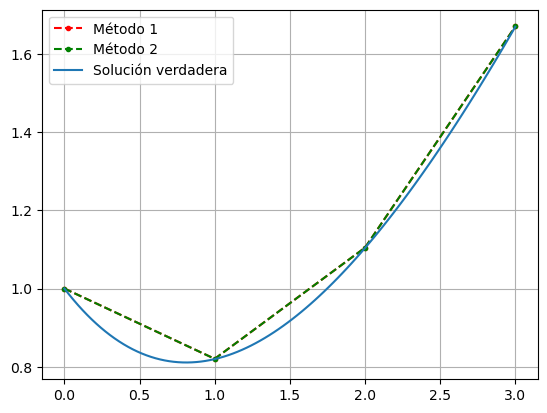

In [25]:
def funcion_sol(x):
    return x-2+3*np.exp(-x/2)
Comparacion_metodos(RK4(f,1,0,3,1),RK4(f,1,0,3,1),funcion_sol)

# Método del punto medio
Fijado $h \neq 0$, podemos obtener aproximaciones de la solución del problema de valor inicial
$$
y^{\prime}=f(t, y), \quad y\left(t_0\right)=y_0
$$
en los puntos $t_1, t_2, \ldots, t_N$, con $t_i=t_{i-1}+h$, mediante
$$
\begin{aligned}
y_{i+1} & =y_i+h f\left(t_i+\frac{h}{2}, y_i+\frac{h}{2} f\left(t_i, y_i\right)\right)
\end{aligned}
$$ 

In [26]:
def RK2(f,y_0,a,b,h):
    n=round((b-a)/h)
    X=[a]
    Y=[y_0]
    t_i=a
    y_i=y_0
    for i in range(1,n+1):
        y_new=y_i+h*f(t_i+h/2,y_i+0.5*h*f(t_i,y_i))
        y_i=y_new
        Y.append(y_i)
        t_i=t_i+h
        X.append(t_i)
    return X,Y

+---+-------+------------+------------+--------------------+
| i |  x_i  | y_Metodo 1 | y_Método 2 |     verdadero      |
+---+-------+------------+------------+--------------------+
| 0 | 0.000 |  1.00000   |  1.00000   |        1.0         |
| 1 | 1.000 |  0.82031   |  0.87500   | 0.8195919791379003 |
| 2 | 2.000 |  1.10451   |  1.17188   | 1.103638323514327  |
| 3 | 3.000 |  1.67019   |  1.73242   | 1.6693904804452895 |
+---+-------+------------+------------+--------------------+


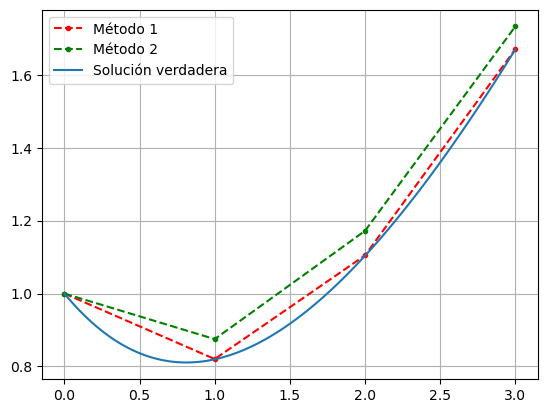

In [32]:
def f(t,y):
    return (t-y)/2
Comparacion_metodos(RK4(f,1,0,3,1),RK2(f,1,0,3,1),funcion_sol)

In [28]:
def f(t,y):
    return -2*t*y
Tabla(RK2(f,1,0,1,0.2))

+---+-------+---------+
| i |  x_i  |   y_i   |
+---+-------+---------+
| 0 | 0.000 | 1.00000 |
| 1 | 0.200 | 0.96000 |
| 2 | 0.400 | 0.84941 |
| 3 | 0.600 | 0.69312 |
| 4 | 0.800 | 0.52233 |
| 5 | 1.000 | 0.36438 |
+---+-------+---------+


# Método modificado de Euler 
Fijado $h \neq 0$, podemos obtener aproximaciones de la solución del problema de valor inicial
$$
y^{\prime}=f(t, y), \quad y\left(t_0\right)=y_0
$$
en los puntos $t_1, t_2, \ldots, t_N$, con $t_i=t_{i-1}+h$, mediante
$$
\begin{aligned}
z_i & =h f\left(t_i, y_i\right) \\
y_{i+1} & =y_i+\frac{1}{2}\left(z_i+h f\left(t_{i+1}, y_i+z_i\right)\right)
\end{aligned}
$$

In [36]:
def EulerModificado(f,y_0,a,b,h):
    n=round((b-a)/h)
    X=[a]
    Y=[y_0]
    t_i=a
    y_i=y_0
    for i in range(1,n+1):
        z_i=h*f(t_i,y_i)
        y_new=y_i+0.5*(z_i+h*f(t_i+h,y_i+z_i))
        y_i=y_new
        Y.append(y_i)
        t_i=t_i+h
        X.append(t_i)
    return X,Y

In [37]:
def f(t,y):
    return (t-y)/2
Tabla(EulerModificado(f,1,0,3,0.25))

+----+-------+---------+
| i  |  x_i  |   y_i   |
+----+-------+---------+
| 0  | 0.000 | 1.00000 |
| 1  | 0.250 | 0.89844 |
| 2  | 0.500 | 0.83807 |
| 3  | 0.750 | 0.81408 |
| 4  | 1.000 | 0.82220 |
| 5  | 1.250 | 0.85866 |
| 6  | 1.500 | 0.92014 |
| 7  | 1.750 | 1.00372 |
| 8  | 2.000 | 1.10680 |
| 9  | 2.250 | 1.22710 |
| 10 | 2.500 | 1.36259 |
| 11 | 2.750 | 1.51151 |
| 12 | 3.000 | 1.67227 |
+----+-------+---------+


+---+-------+------------+------------+--------------------+
| i |  x_i  | y_Metodo 1 | y_Método 2 |     verdadero      |
+---+-------+------------+------------+--------------------+
| 0 | 0.000 |  1.00000   |  1.00000   |        1.0         |
| 1 | 0.500 |  0.84375   |  0.83643   | 0.8364023492142145 |
| 2 | 1.000 |  0.83105   |  0.81963   | 0.8195919791379003 |
| 3 | 1.500 |  0.93051   |  0.91714   | 0.917099658223044  |
| 4 | 2.000 |  1.11759   |  1.10368   | 1.103638323514327  |
| 5 | 2.500 |  1.37311   |  1.35956   | 1.3595143905805702 |
| 6 | 3.000 |  1.68212   |  1.66943   | 1.6693904804452895 |
+---+-------+------------+------------+--------------------+


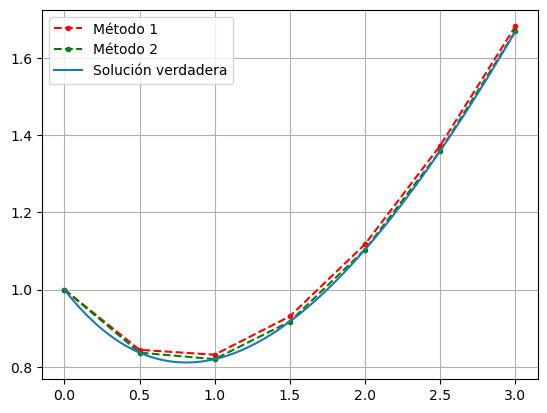

In [43]:
def f(t,y):
    return (t-y)/2
Comparacion_metodos(RK2(f,1,0,3,0.5),RK4(f,1,0,3,0.5),funcion_sol)

Utilizar el método modificado de Euler con $N=5$, para aproximar soluciones del problema de valor inicial
$$
y^{\prime}=-3 t^2(y+1) \quad 1 \leq t \leq 2
$$
sujeto a:
$$
y(1)=-2
$$
cuya solución real es $y(t)=-e^{-t^3+1}-1$.  

In [44]:
def f(t,y):
    return -3*(t**2)*(y+1)
Tabla(EulerModificado(f,-2,1,2,0.2))

+---+-------+----------+
| i |  x_i  |   y_i    |
+---+-------+----------+
| 0 | 1.000 | -2.00000 |
| 1 | 1.200 | -1.52720 |
| 2 | 1.400 | -1.25729 |
| 3 | 1.600 | -1.14078 |
| 4 | 1.800 | -1.10601 |
| 5 | 2.000 | -1.12305 |
+---+-------+----------+


+---+-------+------------+------------+---------------------+
| i |  x_i  | y_Metodo 1 | y_Método 2 |      verdadero      |
+---+-------+------------+------------+---------------------+
| 0 | 1.000 |  -2.00000  |  -2.00000  |         -2.0        |
| 1 | 1.200 |  -1.52720  |  -1.49180  | -1.4828737725312298 |
| 2 | 1.400 |  -1.25729  |  -1.20855  |  -1.174819721307387 |
| 3 | 1.600 |  -1.14078  |  -1.09255  |  -1.045229760077757 |
| 4 | 1.800 |  -1.10601  |  -1.05532  | -1.0079705641858228 |
| 5 | 2.000 |  -1.12305  |  -1.05197  | -1.0009118819655545 |
+---+-------+------------+------------+---------------------+


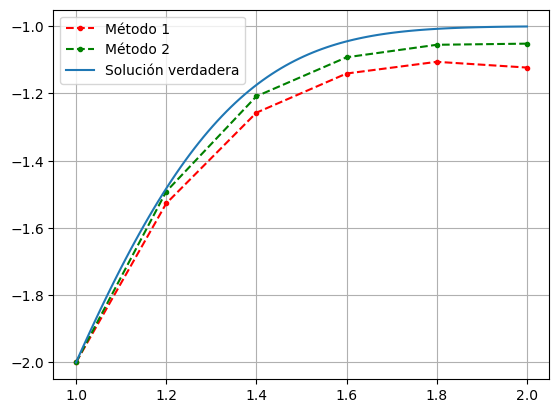

In [49]:
def f(t,y):
    return -3*(t**2)*(y+1)
def funcion_solucion(t):
    return -np.exp(-t**3+1)-1
Comparacion_metodos(EulerModificado(f,-2,1,2,0.2),RK2(f,-2,1,2,0.2),funcion_solucion)

# Método de Adams-Moulton 
Programar el método de Adams-Moulton  para (PVI) como una función   $\color{blue}{\textbf{Adams}(f,y_0,a,b,n)}$ incorporando algoritmo RK4 para calcular los primeros 4 pasos  y que retorne la lista $[(x_0,y_0), (x_1,y_1),\ldots,(x_n,y_n)]$. 
El método esta dado por: 
$$
y_{k+1}=y_k+\frac{h}{24}\left(f_{k-2}-5 f_{k-1}+19 f_k+9 f_{k+1}\right) .
$$
donde se tiene que  $f_{k+1}=f\left(t_{k+1}, p_{k+1}\right)$ y $$p_{k+1}=y_k+\frac{h}{24}\left(-9 f_{k-3}+37 f_{k-2}-59 f_{k-1}+55 f_k\right)$$ para $k\geq 3$ 

In [63]:
def AdamsM(f,y_0,a,b,h):
    Start=RK4(f,y_0,a,a+3*h,h)
    X=Start[0]
    Y=Start[1]
    y_k=Y[3]
    t_k=a+3*h
    ff=[f(a,Y[0]),f(a+h,Y[1]),f(a+2*h,Y[2]),f(a+3*h,Y[3])]
    n=round((b-a)/h)
    for k in range(3,n):
        p_new=y_k+h*(-9*ff[k-3]+37*ff[k-2]-59*ff[k-1]+55*ff[k])/24
        t_k=t_k+h
        p_k=p_new
        f_k=f(t_k,p_k)
        ff.append(f_k)
        y_new=y_k+h*(ff[k-2]-5*ff[k-1]+19*ff[k]+9*ff[k+1])/24
        Y.append(y_new)
        X.append(t_k)
        y_k=y_new
    return X,Y

In [65]:
def f(t,y):
    return (t-y)/2
Tabla(AdamsM(f,1,0,3,0.25))

+----+-------+---------+
| i  |  x_i  |   y_i   |
+----+-------+---------+
| 0  | 0.000 | 1.00000 |
| 1  | 0.250 | 0.89749 |
| 2  | 0.500 | 0.83640 |
| 3  | 0.750 | 0.81187 |
| 4  | 1.000 | 0.81959 |
| 5  | 1.250 | 0.85578 |
| 6  | 1.500 | 0.91709 |
| 7  | 1.750 | 1.00057 |
| 8  | 2.000 | 1.10363 |
| 9  | 2.250 | 1.22394 |
| 10 | 2.500 | 1.35950 |
| 11 | 2.750 | 1.50850 |
| 12 | 3.000 | 1.66938 |
+----+-------+---------+


+----+-------+------------+------------+---------------------+
| i  |  x_i  | y_Metodo 1 | y_Método 2 |      verdadero      |
+----+-------+------------+------------+---------------------+
| 0  | 1.000 |  -2.00000  |  -2.00000  |         -2.0        |
| 1  | 1.100 |  -1.71823  |  -1.71823  |  -1.71820516904057  |
| 2  | 1.200 |  -1.48294  |  -1.48294  | -1.4828737725312293 |
| 3  | 1.300 |  -1.30222  |  -1.30222  |  -1.302099151278283 |
| 4  | 1.400 |  -1.17504  |  -1.17500  | -1.1748197213073868 |
| 5  | 1.500 |  -1.09357  |  -1.09324  | -1.0930144892106635 |
| 6  | 1.600 |  -1.04622  |  -1.04547  | -1.0452297600777567 |
| 7  | 1.700 |  -1.02111  |  -1.02020  |  -1.019980469650639 |
| 8  | 1.800 |  -1.00923  |  -1.00815  | -1.0079705641858228 |
| 9  | 1.900 |  -1.00230  |  -1.00298  | -1.0028540963524595 |
| 10 | 2.000 |  -1.00582  |  -1.00099  | -1.0009118819655545 |
+----+-------+------------+------------+---------------------+


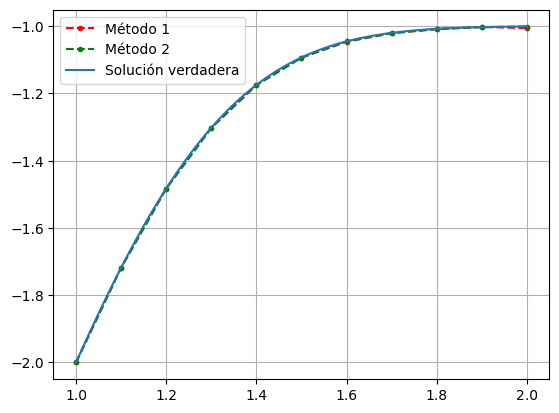

In [70]:
def f(t,y):
    return -3*(t**2)*(y+1)
def funcion_solucion(t):
    return -np.exp(-t**3+1)-1
Comparacion_metodos(AdamsM(f,-2,1,2,0.1),RK4(f,-2,1,2,0.1),funcion_solucion)